## Machine Learning is the study of computer algorithms that improve automatically through experience and by the use of data.

## Machine Learning (ML) is a subfield of artificial intelligence (AI) that focuses on developing algorithms and statistical 
## models that enable computers to learn from data and make decisions or predictions.


## 1. Core Concepts of Machine Learning

*   **Supervised Learning:** Learning from labeled data. We have input features (X) and a known output target (y). The goal is to learn a mapping function `y = f(X)`.
    *   **Regression:** Predicting a continuous value (e.g., price, temperature, salary).
    *   **Classification:** Predicting a discrete category (e.g., Spam/Not Spam, Cat/Dog).


*   **Unsupervised Learning:** Learning from unlabeled data. The goal is to find hidden patterns or structures in the data (e.g., clustering customers into groups).

    
*   **Reinforcement Learning: Learning by interacting with an environment. An agent learns to take actions that maximize a reward over time.
    * The agent gets feedback in the form of rewards or penalties.
    * Common in robotics, games (e.g., AlphaGo), and self-driving cars.


*   **The ML Workflow:**
    1.  Get Data
    2.  Explore & Preprocess Data (EDA)
    3.  Split Data (Train/Test)
    4.  Choose & Train a Model
    5.  Evaluate the Model


## 2. Linear Regression

Linear Regression is the "hello world" of supervised learning. It assumes a linear relationship between the input features (X) 
and the output target (y).

**Formula:** `y = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + b`

*   `y`: The predicted value.
*   `x_i`: The input features.
*   `w_i`: The weights or coefficients (what the model learns). Represents the importance of each feature.
*   `b`: The bias or intercept.

In [5]:
#Salary prediction 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#1 Loading the data
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}

df = pd.DataFrame(data)


In [6]:
#2Exploratory Data Analaysis(EDA)

print(df.head())
df.info()


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


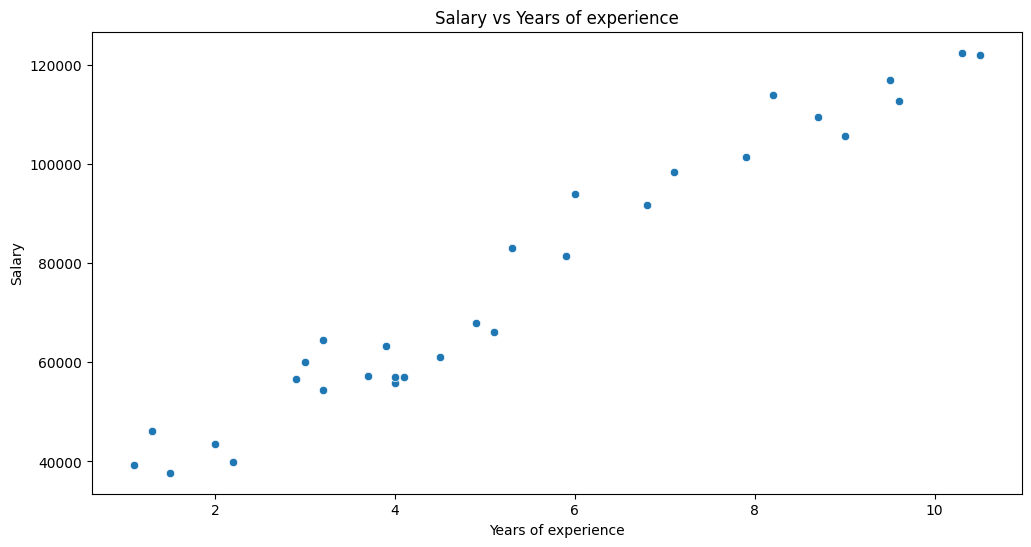

In [7]:
#Visualize the relationship 
plt.figure(figsize=(12,6))
sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.title('Salary vs Years of experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [8]:
#3.Prepare data for modeling
#X should be a 2D array, so we use [['YEarsExperience']]
X=df[['YearsExperience']]
print(X.shape)
y=df['Salary']

(30, 1)


In [10]:
#Split the data into training and testing sets(80% train, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"\nTesting set shape: {X_test.shape}")



Training set shape: (24, 1)

Testing set shape: (6, 1)


In [11]:
#4. Choose and train the model
model=LinearRegression()
model.fit(X_train,y_train)
print("\nModel training complete: ")

#print the learned parameters
print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


Model training complete: 
Coefficient (w1): 9423.815323030976
Intercept (b): 25321.583011776813


In [14]:
#5. Evaluate the model
y_pred=model.predict(X_test)

#Calculate metrics
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}") #R2 is the proportion, closer to 1 is better


Mean Squared Error (MSE): 49830096.86
R-squared (R2): 0.90


In [15]:
new_experience = np.array([[5.0]])
predicted_salary = model.predict(new_experience)
print(f"\nPredicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}")


Predicted salary for 5.0 years of experience: $72440.66


d:\TechAxis\week23\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
new_experience = np.array([[10]])
predicted_salary = model.predict(new_experience)
print(f"\nPredicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}")


Predicted salary for 10 years of experience: $119559.74


d:\TechAxis\week23\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


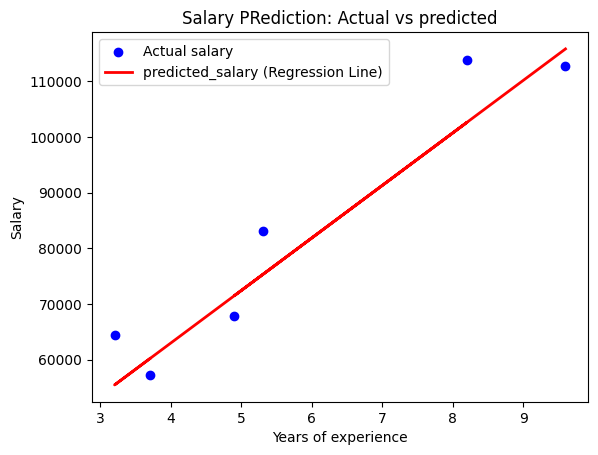

In [17]:
plt.Figure(figsize=(10,6))
plt.scatter(X_test,y_test,color='blue',label='Actual salary')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='predicted_salary (Regression Line)')
plt.title('Salary PRediction: Actual vs predicted')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.legend()
plt.show()